In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
    
sns.set(style="whitegrid")

m_range = [0,5,10,20,30,40,50,60,70,80,90,100]

In [2]:
def read_data (filename, skip_rows = 9, treshold = 6):

    df = pd.read_csv( filename, skiprows = skip_rows, names= m_range)
    df.drop( [70,80,90,100], axis = 1, inplace = True)
    
    for i in range(len(df[10]) ):
        if (df[10][i] == df[5][i]):
            df[20][i] = df[10][i]
    
    for m in [20,30,40,50,60]:
        for i in range( len(df[10])):
            if (df[m][i] == df[m-10][i] and m < 60):
                df[m+10][i] = df[m][i]                

    df.dropna(axis = 'index', thresh = treshold, inplace = True)
    df.index = np.arange( len(df[10]) )
    
    while len(df[10]) > 200:
        df.drop([ len(df[10])-1], axis = 0, inplace = True)
    
    if len(df[10]) < 200:
        print("WARNING! Less than 200 samples in file: {:}", filename)
    
    return df #df.astype(dtype = 'int32')

In [3]:
def multi_histogram(df1, df2, df3, df4, df0, limit = [200, 300, 400, 500], filename = 'test.png'):
    
    fig, axs = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (15,20))
       
    for row in axs:
        for ax in row:               
            ax.xaxis.label.set_size(12)
            #ax.set_ylim([0,1])
            ax.set_xlabel('n', ha = 'right', va = 'top', fontsize = 15)           
            ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 15)      
            ax.grid(True)
            
    k = 20  
    color = ['r','m', 'b', 'g']
    j = 0
    
    for i in range (4):
        m = 20+i*10
        
        axs[i][0].hist(df4[m], k, color= 'g', alpha=0.4, normed = True, 
                       label = 'n = 200', range = (0, limit[i]))
        
        axs[i][0].hist(df3[m], k, color= 'b', alpha=0.4, normed = True,
                       label = 'n = 100', range = (0, limit[i]))       
        
        axs[i][0].hist(df2[m], k, color= 'm', alpha=0.4, normed = True, 
                       label = 'n = 50', range = (0, limit[i]))
        
        axs[i][0].hist(df1[m], k, color= 'r', alpha=0.4, normed = True, 
                       label = 'n = 25', range = (0, limit[i]))
        
        
        
        axs[i][1].hist(df0[m], k, color= 'gray', alpha=0.75, normed = True, range = (0, limit[i]))

        axs[i][0].set_title('range {:}'.format(m), fontsize = 20)
        axs[i][1].set_title('range {:}'.format(m), fontsize = 20)
        
        axs[i][0].set_xlim([0,limit[i]])
        axs[i][1].set_xlim([0,limit[i]])
       
        axs[i][0].legend( loc='upper right', fontsize = 15, 
                         title = 'number of long links', title_fontsize = 18)
           
    
    fig.tight_layout()      
    fig.savefig(filename)
    
    return


## X = 50, $\lambda = 1$

WARNING! Less than 200 samples in file: {:} n0c10X50l1.csv


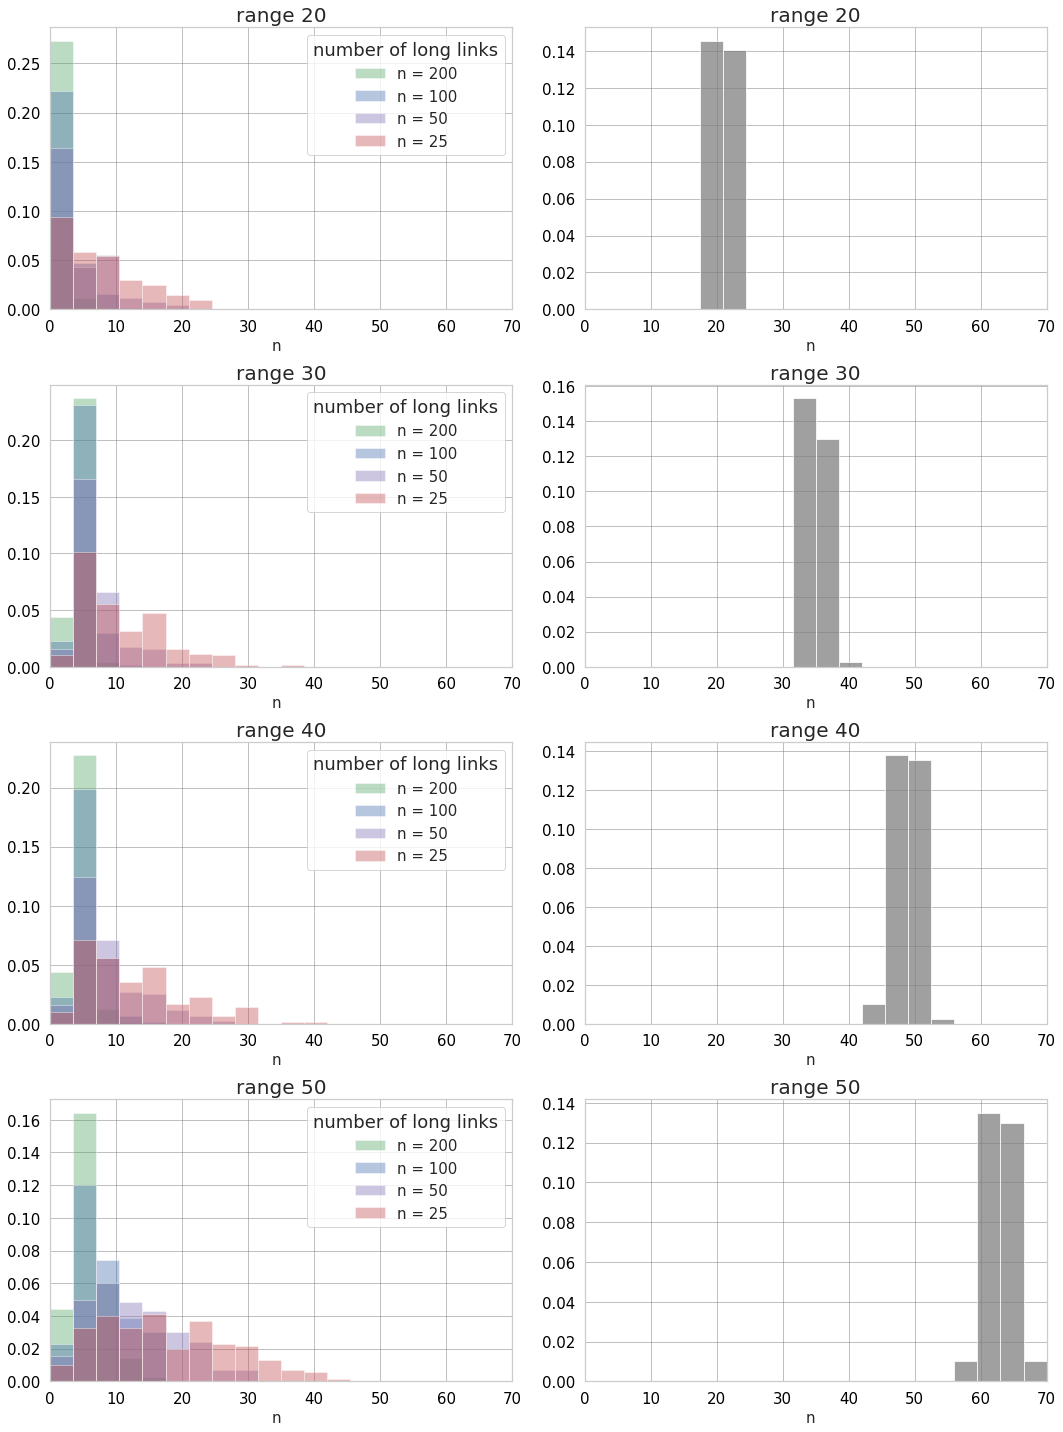

In [10]:
df25 = read_data('n25c10X50l1.csv')
df50 = read_data('n50c10X50l1.csv')
df100 = read_data('n100c10X50l1.csv')
df200 = read_data('n200c10X50l1.csv')
df0 = read_data('n0c10X50l1.csv')

multi_histogram(df25, df50, df100, df200, df0, limit = [70,70,70,70,70], filename = 'c10X50l1.png')

WARNING! Less than 200 samples in file: {:} n0c10X100l1.csv


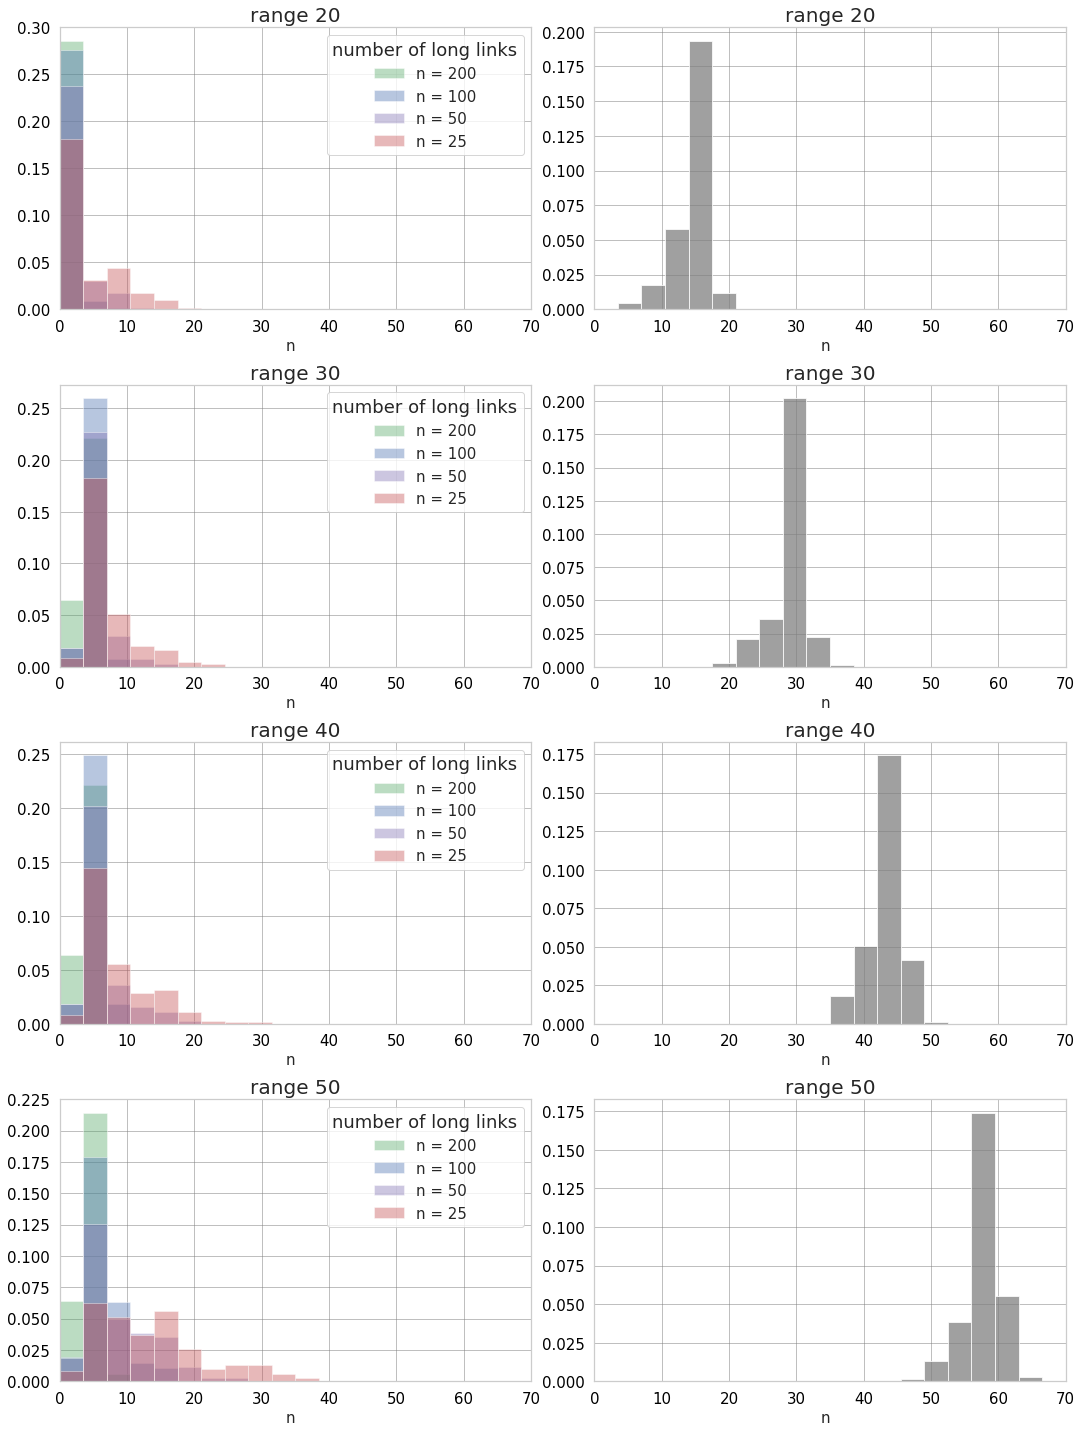

In [5]:
df25 = read_data('n25c10X100l1.csv')
df50 = read_data('n50c10X100l1.csv')
df100 = read_data('n100c10X100l1.csv')
df200 = read_data('n200c10X100l1.csv')
df0 = read_data('n0c10X100l1.csv')

multi_histogram(df25, df50, df100, df200, df0, limit = [70,70,70,70],  filename = 'c10X100l1.png')

WARNING! Less than 200 samples in file: {:} n0c15X50l1.csv


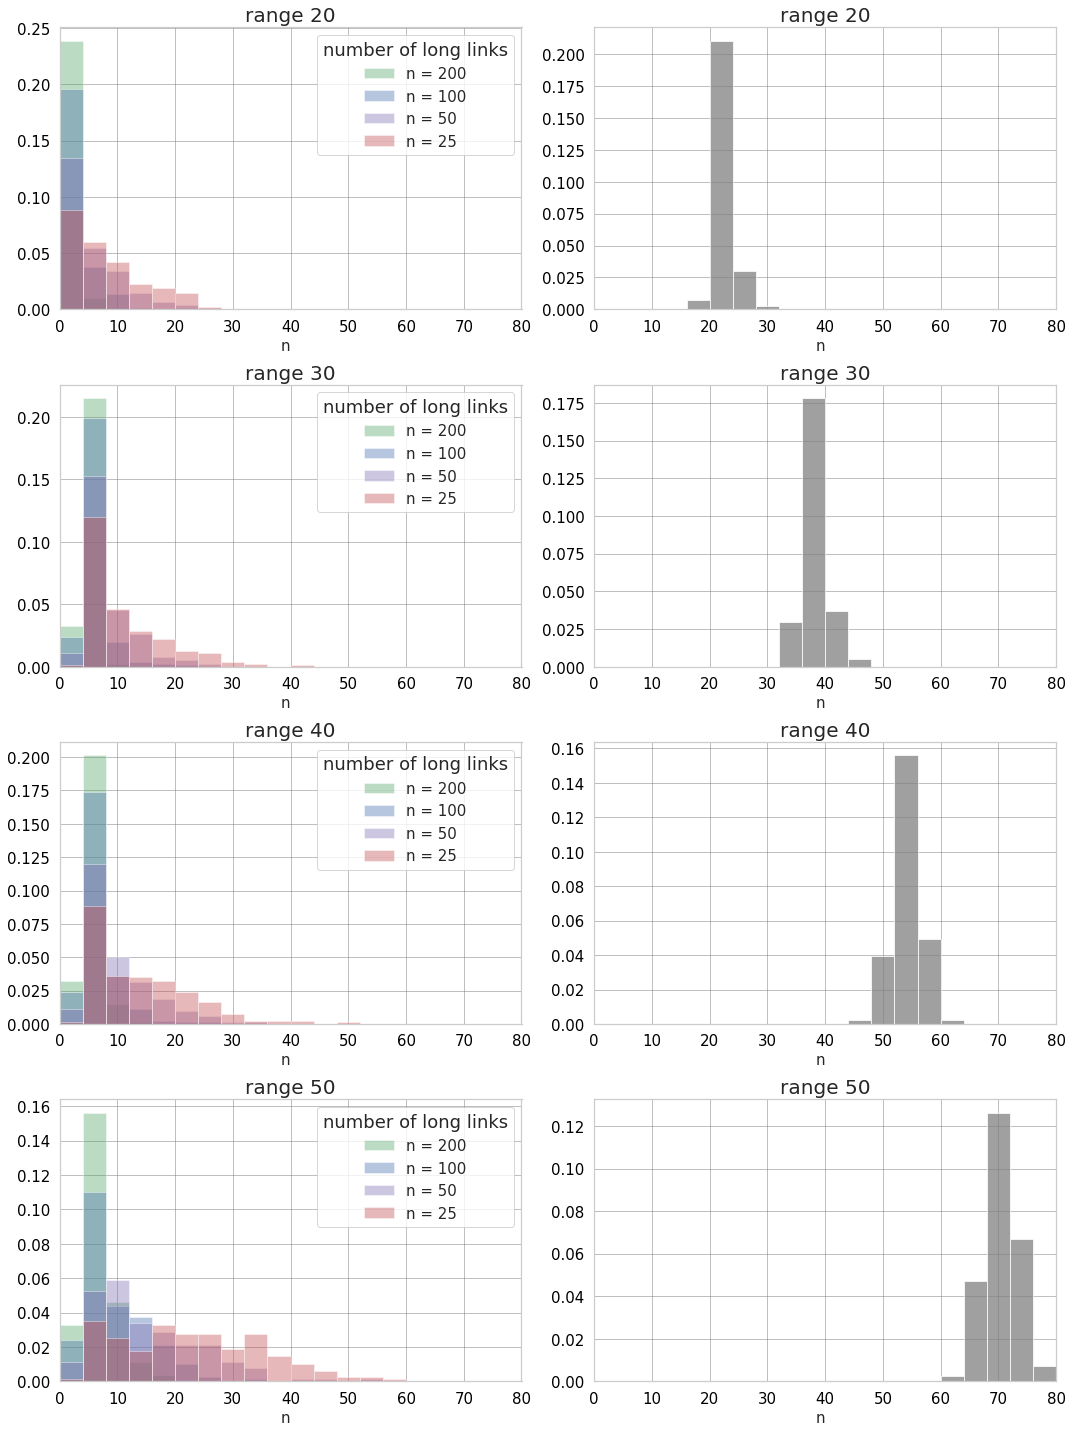

In [6]:
df25 = read_data('n25c15X50l1.csv')
df50 = read_data('n50c15X50l1.csv')
df100 = read_data('n100c15X50l1.csv')
df200 = read_data('n200c15X50l1.csv')
df0 = read_data('n0c15X50l1.csv')

multi_histogram(df25, df50, df100, df200, df0, limit = [80,80,80,80],  filename = 'c15X50l1.png')

WARNING! Less than 200 samples in file: {:} n0c15X100l1.csv


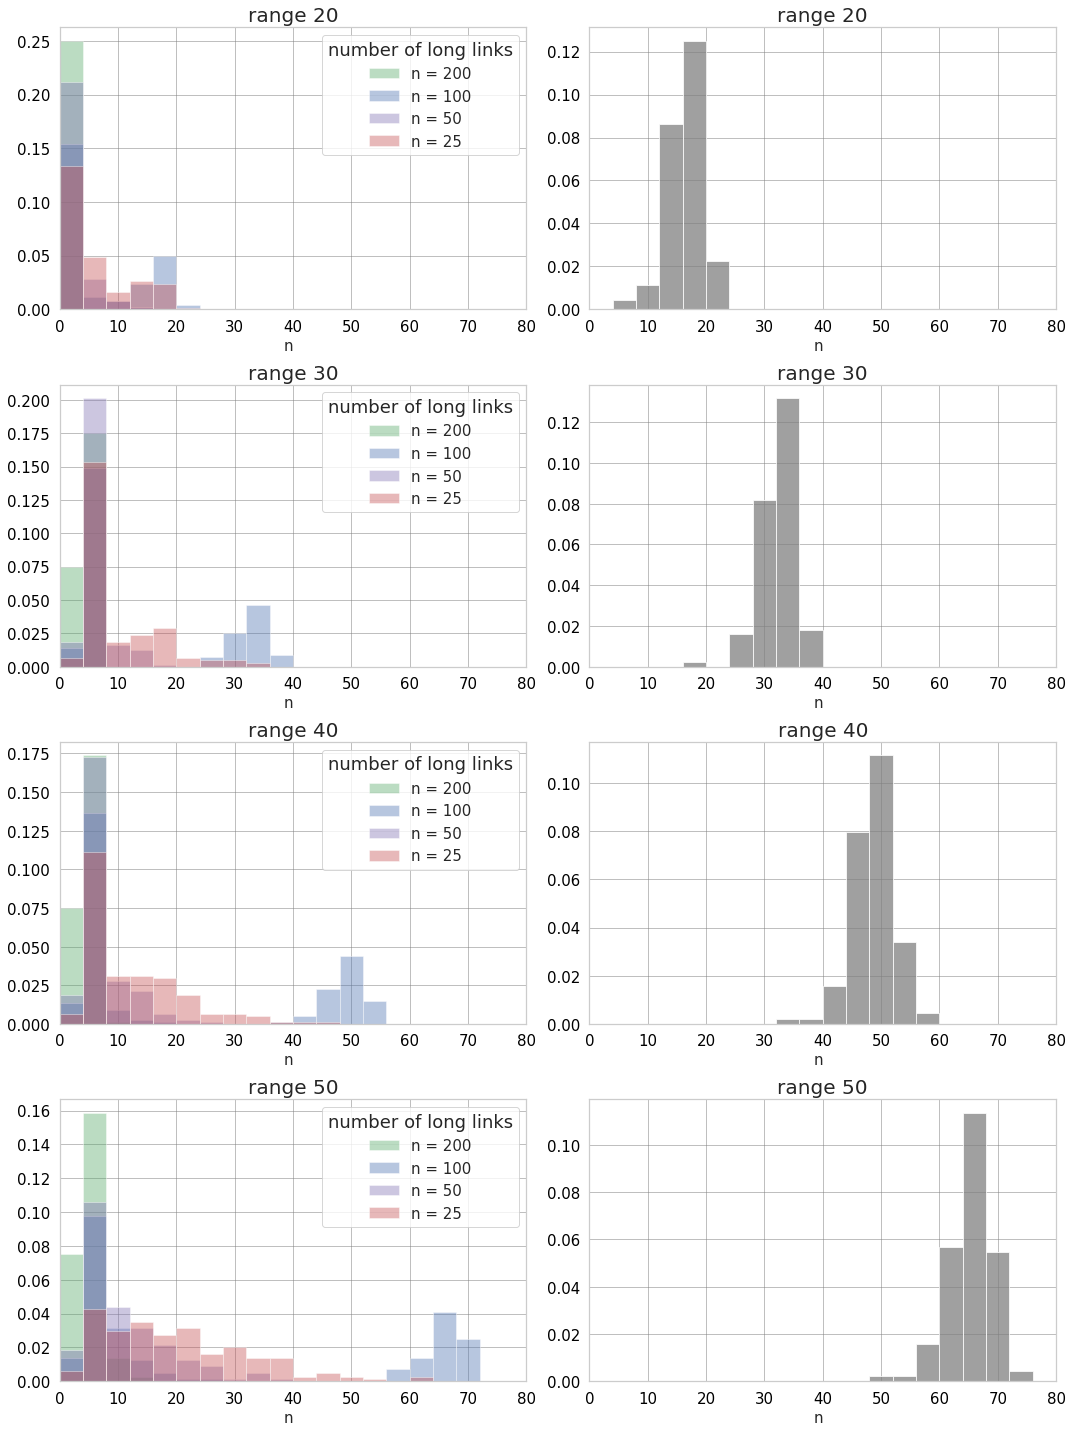

In [7]:
df25 = read_data('n25c15X100l1.csv')
df50 = read_data('n50c15X100l1.csv')
df100 = read_data('n100c15X100l1.csv')
df200 = read_data('n200c15X100l1.csv')
df0 = read_data('n0c15X100l1.csv')

multi_histogram(df25, df50, df100, df200, df0, limit = [80, 80, 80, 80],  filename = 'c15X100l1.png')

WARNING! Less than 200 samples in file: {:} n25c20X50l1.csv
WARNING! Less than 200 samples in file: {:} n0c20X50l1.csv


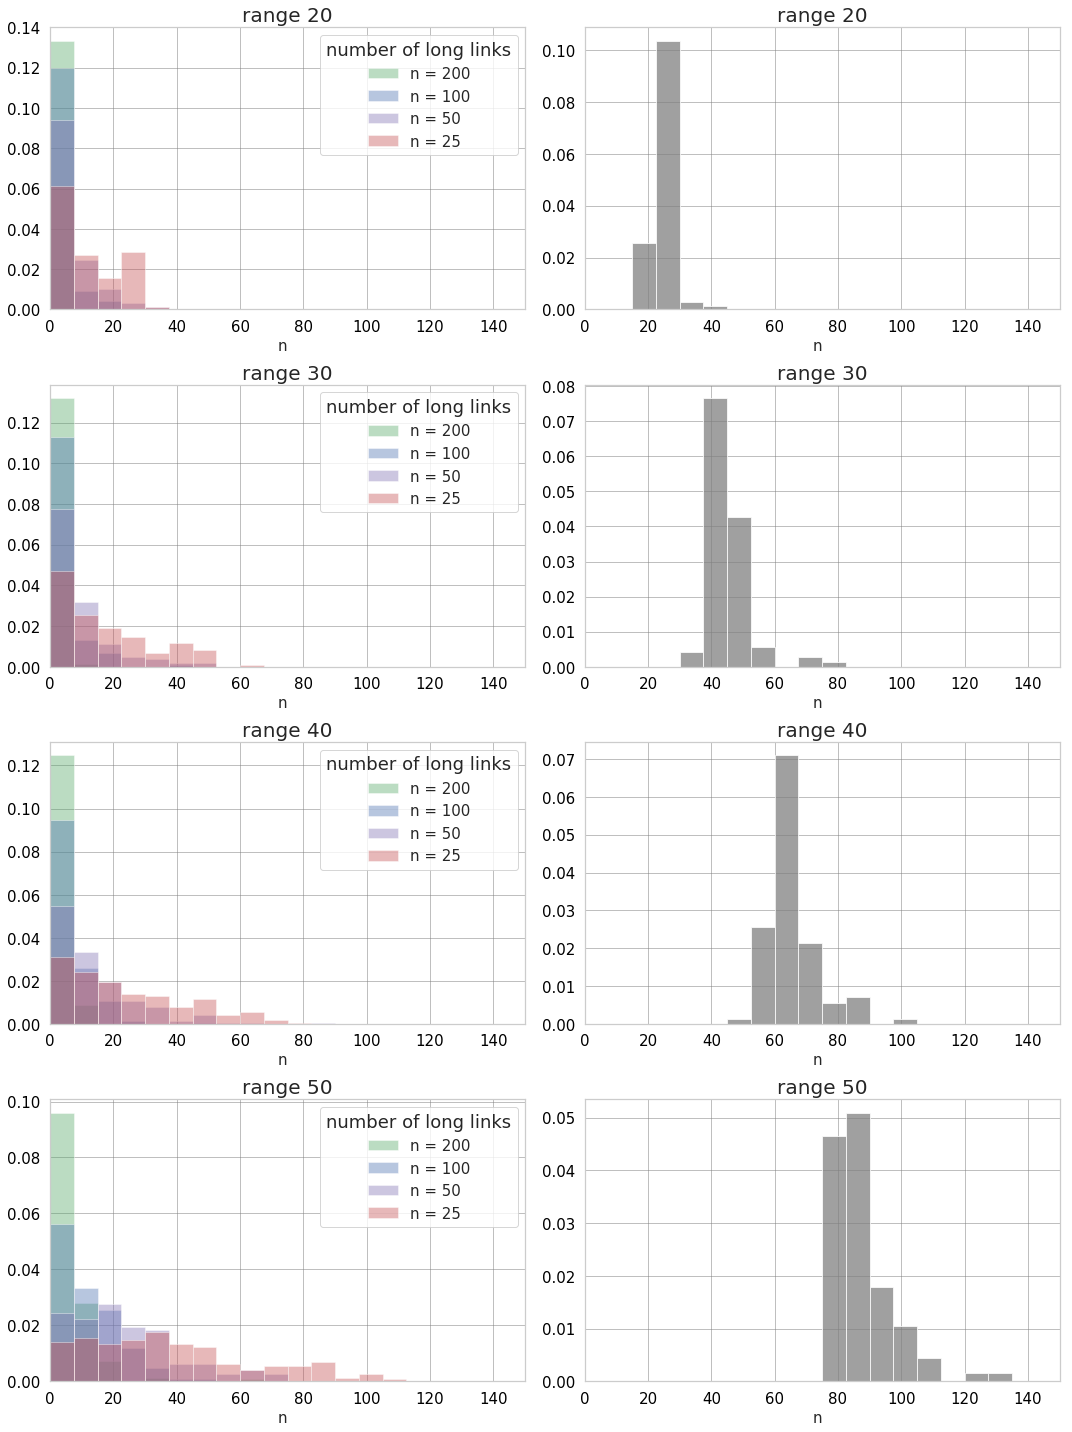

In [8]:
df25 = read_data('n25c20X50l1.csv')
df50 = read_data('n50c20X50l1.csv')
df100 = read_data('n100c20X50l1.csv')
df200 = read_data('n200c20X50l1.csv')
df0 = read_data('n0c20X50l1.csv')

multi_histogram(df25, df50, df100, df200, df0, limit = [150,150,150,150,150],  filename = 'c20X50l1.png')

WARNING! Less than 200 samples in file: {:} n50c20X100l1.csv
WARNING! Less than 200 samples in file: {:} n0c20X50l1.csv


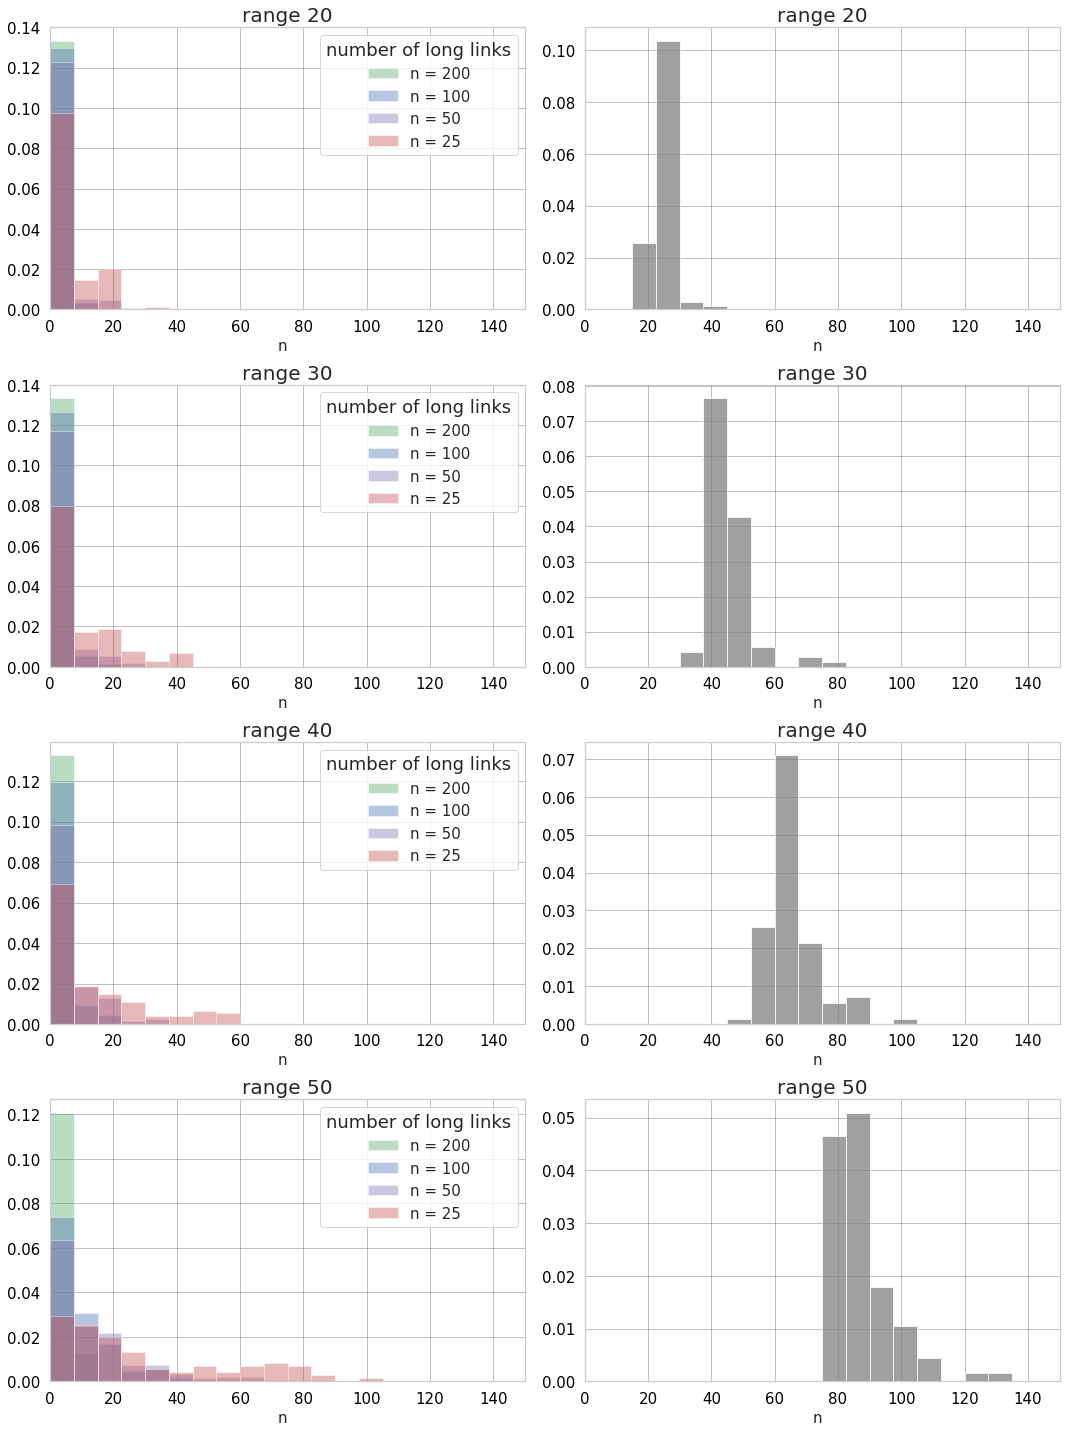

In [9]:
df25 = read_data('n25c20X100l1.csv')
df50 = read_data('n50c20X100l1.csv')
df100 = read_data('n100c20X100l1.csv')
df200 = read_data('n200c20X100l1.csv')
df0 = read_data('n0c20X50l1.csv')

multi_histogram(df25, df50, df100, df200, df0, limit = [150,150,150,150],  filename = 'c20X100l1.png')